# Лабораторна робота №3
## з дисципліни "Чисельні методи"

##### За темою: "Обчислення власних значень і власних векторів матриць"

##### Виконав: студент групи КА-12 Гавлицький Іван
##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* придбання практичних навичок в чисельному визначенні власних значень і власних векторів матриць на підставі використання характеристичних рівнянь і ортогональних перетворень. Визначення можливості застосування засобів стандартних пакетів для отримання результатів.

## Варіант 38

##### Згенерувати матрицю в якості індивідуального варіанту завдання.

$$
A = 
\begin{pmatrix}
n & 7 & 2 & 4 & m & -3\\
5 & -l & -2 & -3 & -3 & 2\\
2 & -1 & k & -1 & 2 & -2j\\
2l & 5 & -1 & -i & 2 & -2\\
-2 & -4 & 3 & 1 & j & -2\\
-1 & -3k & 8 & 2 & -2 & m\\
\end{pmatrix}
$$

##### n – наскрізний номер варіанту у загальному списку академічних груп,
##### m – друга цифра наскрізного номеру варіанту у загальному списку академічних груп +3 (для одно- або дворозрядних номерів виходити з правила нормування n=001 або n=011),
##### l – третя цифра наскрізного номеру варіанту у загальному списку академічних груп
##### k – сума другої і третьої цифр наскрізного номеру варіанту у загальному списку академічних груп,
##### i – різниця другої і першої цифр номера за переліком варіантів у загальному списку академічних груп + 2,
##### j – модуль різниці першої і третьої цифр номера за переліком варіантів у загальному списку академічних груп.

In [98]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Згенеруємо матрицю для варіанту 38

In [99]:
def get_variant(variant):
    nn = int(variant)
    mm = int(variant[1]) + 3
    ll = int(variant[2])
    kk = int(variant[1]) + int(variant[2])
    ii = int(variant[1]) - int(variant[0]) + 2
    jj = np.abs(int(variant[0]) - int(variant[2]))
     
    return np.array([
        [nn, 7, 2, 4, mm, -3],
        [5, -ll, -2, -3, -3, 2],
        [2, -1, kk, -1, 2, -2*jj],
        [2*ll, 5, -1, -ii, 2, -2],
        [-2, -4, 3, 1, jj, -2],
        [-1, -3*kk, 8, 2, -2, mm]])    

A = get_variant('038')
print(A)

[[ 38   7   2   4   6  -3]
 [  5  -8  -2  -3  -3   2]
 [  2  -1  11  -1   2 -16]
 [ 16   5  -1  -5   2  -2]
 [ -2  -4   3   1   8  -2]
 [ -1 -33   8   2  -2   6]]


### Методи безпосереднього розгортання:

#### Метод Крилова

In [100]:
def krylov_matrix(A, x_0):
    O = np.zeros_like(A)
    n = A.shape[0]
    
    O[-1] = x_0.copy()
    
    for ii in range(1, n):
        O[-(ii + 1)] = A.dot(O[-ii])
    x_n = -A.dot(O[0])

    return O.T, x_n

##### Покладемо $x_0 = (0, 0, 0, 1, 0, 0)^T$

In [101]:
x_0 = np.zeros(A.shape[0])
x_0[3] = 1
K, x_n = krylov_matrix(A, x_0)

print(K)
print(f'Визначник = {linalg.det(K)}')
print(f'x_n = {x_n}')

[[7187196  177745    4557     109       4       0]
 [ 487399   19453      54      62      -3       0]
 [ 808421   15804   -1584     -25      -1       0]
 [2600531   69156    1540      73      -5       1]
 [-381628  -14304    -642       0       1       0]
 [-674956  -24769   -1687      87       2       0]]
Визначник = -7489886301675726.0
x_n = [-288279307  -22413325  -30215133 -104207711   13001306   14889413]


##### Отримали невироджену матрицю. 
##### Розглянемо систему лінійних рівнянь для коефіцієнтів характеристичного поліному матриці:

$$
\begin{pmatrix}
7187196 & 177745 &   4557  &   109   &    4    &   0\\
487399  & 19453  &    54   &   62    &   -3    &   0\\
808421  & 15804  & -1584   &  -25    &   -1    &   0\\
2600531 &  69156 &   1540  &    73   &   -5    &   1\\
-381628 & -14304 &   -642  &     0   &    1    &   0\\
-674956 & -24769 &  -1687  &    87   &    2    &   0\\
\end{pmatrix}
\times
\begin{pmatrix}
b_5\\ b_4\\ b_3\\ b_2\\ b_1\\ b_0\\
\end{pmatrix}
=
\begin{pmatrix}
-288279307\\ -22413325\\ -30215133\\ -104207711\\ 13001306\\ 14889413\\
\end{pmatrix}
$$

##### Розв'яжемо систему, використовуючи вбудовану функцію.

In [102]:
b = np.concatenate(([1], linalg.solve(K, x_n)))
print(b)

[ 1.000000e+00 -5.000000e+01  4.650000e+02 -4.230000e+02 -9.946900e+04
  2.997000e+05  3.072456e+06]


##### Одержали вектор коефіцієнтів характеристичного рівняння.

#### Метод Фадєєва–Левер’є

In [103]:
def fadeev_leverrier_method(A):
    n = A.shape[0]

    b = np.zeros(n + 1)
    b[0] = 1
    K = np.eye(n)

    for ii in range(1, n + 1):
        b[ii] = -1/ii * A.dot(K).trace()
        K = A.dot(K) + b[ii] * np.eye(n)

    return b 

In [104]:
b = fadeev_leverrier_method(A)
print(b)

[ 1.000000e+00 -5.000000e+01  4.650000e+02 -4.230000e+02 -9.946900e+04
  2.997000e+05  3.072456e+06]


##### Бачимо, що вектор коефіцієнтів характеристичного рівняння збігається з одержаним методом Крилова.

#### Таким чином, одержали характеристичне рівняння:
$$
\lambda^6 - 50\lambda^5 + 465\lambda^4 - 423\lambda^3 - 99469\lambda^2 + 299700\lambda +  3072456 = 0
$$ 



#### Обчислимо власні значення

In [105]:
eigvls = np.roots(b)
print(eigvls)

[40.05644901 +0.j         8.23926559+12.9912374j  8.23926559-12.9912374j
  7.50829842 +0.j        -9.49883674 +0.j        -4.54444186 +0.j       ]


##### Порівняємо отриманий результат з з власними значеннями, обчисленими за допомогою вбудованної функції.

In [106]:
print(linalg.eig(A)[0])

[40.05644901 +0.j         8.23926559+12.9912374j  8.23926559-12.9912374j
 -9.49883674 +0.j        -4.54444186 +0.j         7.50829842 +0.j       ]


##### Значення збігаються.

#### Побудуємо графік характеристичного рівняння

In [107]:
def characteristic_polynomial(x, b):
    output = 0
    for ii in range(len(b)):
        output += b[-(ii + 1)] * x**ii

    return output

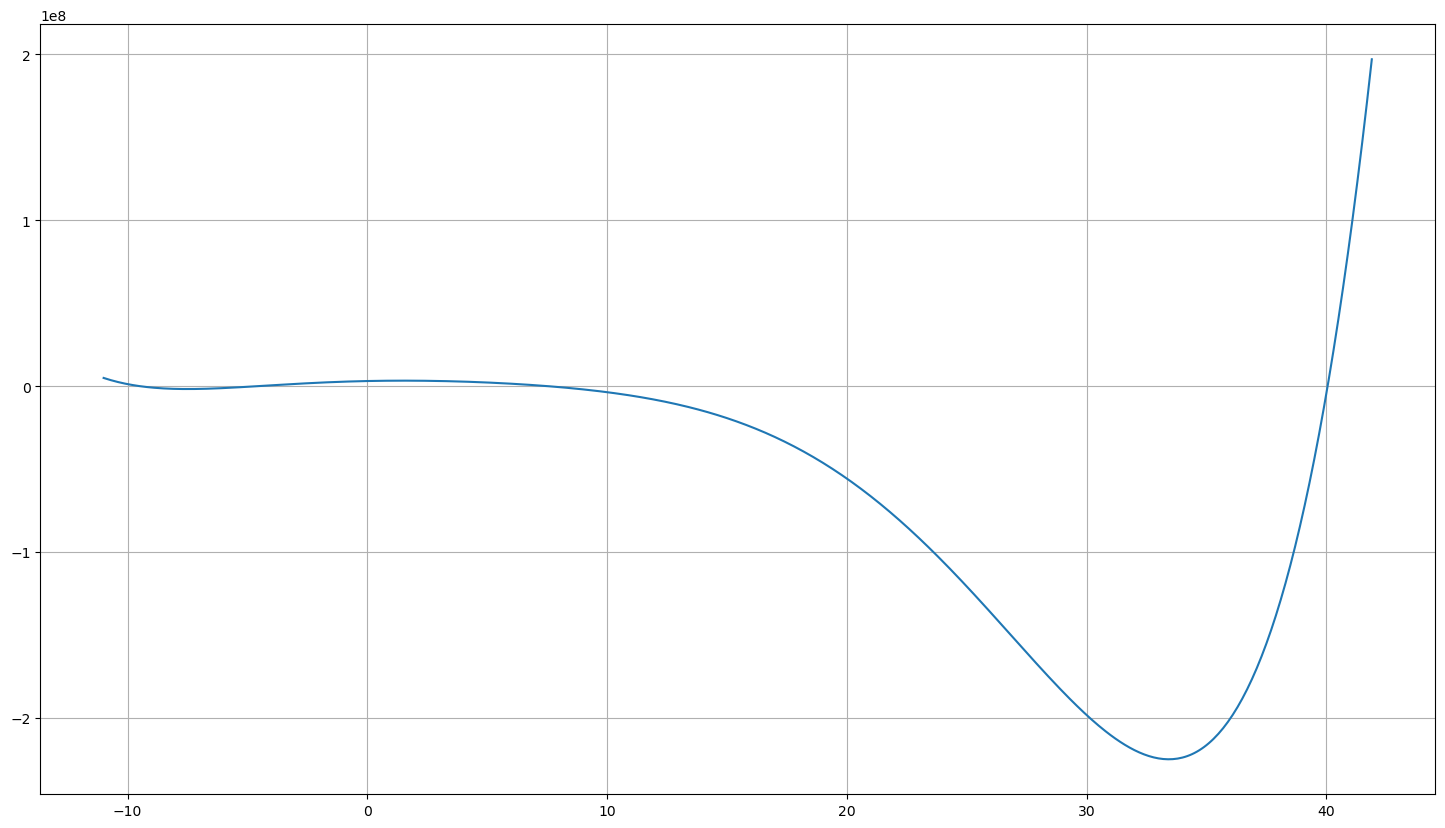

In [108]:
real_eigvls = np.real(eigvls[np.isreal(eigvls)])
fig, axs = plt.subplots(1, 1, figsize = (18, 10))

X = np.arange(-11, 42, 0.1)
Y = np.array([characteristic_polynomial(x, b) for x in X])
axs.plot(X, Y)
axs.grid()


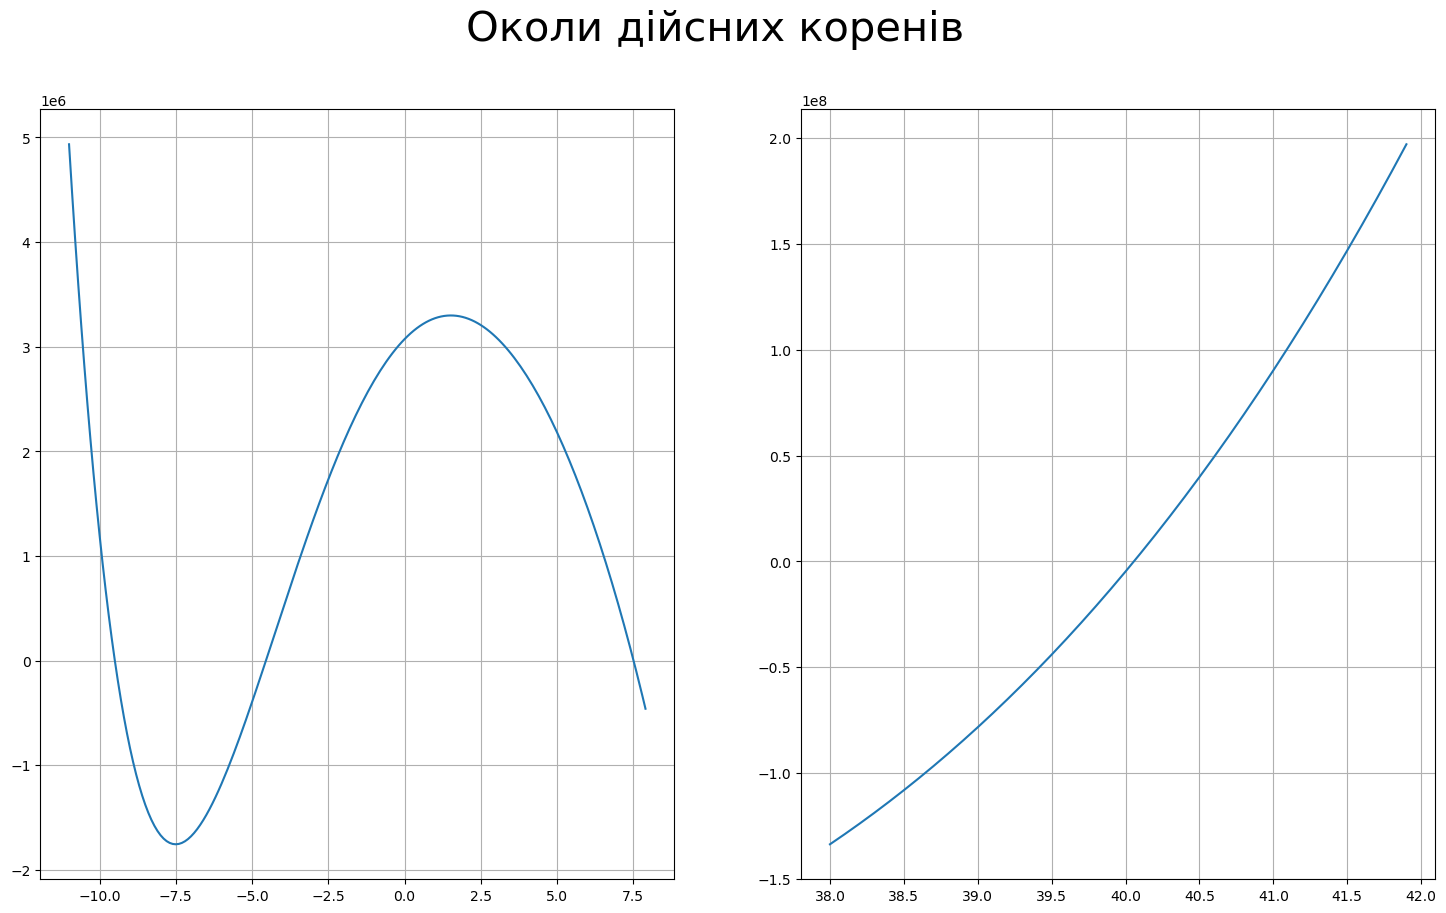

In [109]:
fig, axs = plt.subplots(1, 2, figsize = (18, 10))
fig.suptitle('Околи дійсних коренів', fontsize=30)

X1 = np.arange(-11, 8, 0.1)
Y1 = np.array([characteristic_polynomial(x, b) for x in X1])
axs[0].plot(X1, Y1)
axs[0].grid()

X2 = np.arange(38, 42, 0.1)
Y2 = np.array([characteristic_polynomial(x, b) for x in X2])
axs[1].plot(X2, Y2)
axs[1].grid()

### Ітераційний метод:

#### QR–алгоритм

In [110]:
def qr_method(A, eps):
    for k, A_k in enumerate(qr_sequence(A)):
        print(f'Ітерація: {k}')
        print(A_k.round(3))

        cond, ii = tril_les(A_k, eps)

        if cond:
            return np.delete(np.diag(A_k), [ii, ii+1]), k
        

def qr_sequence(A):
    while True:
        Q, R = linalg.qr(A)
        A = R.dot(Q)
        yield A


def tril_les(A, eps):
    """
    Значення нижче діагоналі по модулю менше eps?
    Оскільки ми знаємо, що в нашому випадку 2 комплексних власних числа
    ропускаю перевірку одного діагонального блоку 2х2.
    Повертає булеве значення та індекс блоку в -1 діагоналі.
    """
    temp = np.abs(np.diag(A, k=-1))
    ii = np.argmax(temp)
    temp = np.delete(temp, ii)

    return np.all(np.abs(linalg.tril(A, k=-2)) < eps) and np.all(temp < eps), ii


##### Покладемо значення $\varepsilon = 0.05$ для значення елементів, що знаходяться нижче головної діагоналі.
##### Враховуючи особливості методу, не будемо звертати уваги на блоки, що відповідають $\lambda_k \notin \mathbb{R}$.

In [111]:
eigvls, k = qr_method(A, 0.05)
print(f'\nДійсні власні числа:\n {eigvls} \nКількість ітерацій: {k}')


Ітерація: 0
[[ 39.359  -0.467   1.193 -11.608   3.784  12.439]
 [ -3.194  -3.714  19.384 -11.799  -0.603 -27.111]
 [  1.148 -13.794  10.828   5.064   3.048   7.097]
 [ -2.528  -4.134   0.104  -4.735  -3.465   4.232]
 [ -0.386   1.248   1.501  -0.784   7.369   1.55 ]
 [  0.079  -3.149  -0.112   0.247   0.2     0.893]]
Ітерація: 1
[[ 4.0019e+01  1.3200e-01 -2.6520e+00 -3.0240e+00  5.4200e+00 -1.5776e+01]
 [ 1.6150e+00  9.5390e+00  1.6213e+01 -8.1710e+00  3.4420e+00  2.9240e+00]
 [-1.1650e+00 -6.6880e+00  5.3600e+00  2.1930e+01  3.7670e+00 -2.3282e+01]
 [ 6.3300e-01 -2.9010e+00 -2.0200e+00 -8.3490e+00 -6.2710e+00 -8.3000e-02]
 [-5.8000e-02  5.0700e-01 -1.5400e-01  3.4500e-01  7.6740e+00 -4.1430e+00]
 [ 9.0000e-03  9.4700e-01  8.3500e-01  9.4300e-01  7.4600e-01 -4.2440e+00]]
Ітерація: 2
[[ 4.0033e+01  9.0000e-03 -1.8160e+00 -2.6440e+00  6.0650e+00  1.5181e+01]
 [-7.9000e-02  8.9590e+00  1.4776e+01 -1.8012e+01 -3.4100e-01 -1.1958e+01]
 [-2.0900e-01 -1.1811e+01  1.1426e+01  1.1702e+01  7.825

##### $\lambda_k \in \mathbb{R}$ збігаються з одержанним точними методами.

##### Визначимо кількість ітерацій, необхідних для досягнення розбіжності між точними і отриманими значеннями на рівні 0.01.

In [112]:
def qr_iter_number(A, eigvls, eps):
    eigvls = np.sort(eigvls)

    for k, A_k in enumerate(qr_sequence(A)):
        eigvls_k = np.diag(A_k)
        print(f'{k}. {eigvls_k}')

        if compare_real(eigvls, eigvls_k, eps):
            return k


def compare_real(a, b, eps):
    a = a[np.isreal(a)]
    compare = np.abs(a - b.reshape(6, 1)) < eps

    return np.all(np.any(compare, axis=0))

In [113]:
print(f'Точне значення: \n{linalg.eig(A)[0]}')

print('QR-метод:')
print(f'Кількість ітерацій: {qr_iter_number(A, linalg.eig(A)[0], 0.01)}')

Точне значення: 
[40.05644901 +0.j         8.23926559+12.9912374j  8.23926559-12.9912374j
 -9.49883674 +0.j        -4.54444186 +0.j         7.50829842 +0.j       ]
QR-метод:
0. [39.35928489 -3.71417734 10.82777452 -4.73503831  7.36935654  0.89279969]
1. [40.01898392  9.53910312  5.36043001 -8.3485503   7.67421827 -4.24418503]
2. [ 40.03299229   8.95870348  11.42636571 -12.96137169   7.33987256
  -4.79656234]
3. [40.05472247  3.54041089 11.24674235 -8.11767313  7.62342768 -4.34763026]
4. [40.05634282 11.73084703  4.45082979 -9.21828566  7.48866409 -4.50839808]
5. [ 40.05717205   7.74782817   9.50668909 -10.38356816   7.60033647
  -4.52845762]
6. [40.05664745  4.58845734 11.46283216 -9.03144901  7.45734124 -4.53382917]
7. [40.05644678 11.97770979  4.47987749 -9.52249472  7.54683281 -4.53837214]
8. [40.05641371  8.08249319  8.57064965 -9.63913577  7.47267282 -4.5430936 ]
9. [40.05643602  4.57131834 11.80173047 -9.42171435  7.53500221 -4.54277269]
10. [40.05644859 11.74554364  4.737254   -

##### Бачимо, що $\lambda_k \in \mathbb{R}$ збігаються із точністю 0.01 вже на 14 ітерації.

## Висновки

##### Під час виконання роботи я придбав практичні навички в чисельному визначенні власних значень і власних векторів матриць на підставі використання характеристичних рівнянь і ортогональних перетворень. Визначив можливості застосування засобів стандартних пакетів для отримання результатів.